# Module 5 Project

## Obtaining the datasets

In [58]:
import pandas as pd
import numpy as np
df = pd.read_csv('train_users_2.csv')
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


### Obtaining 'sessions' dataset

In [60]:
sessions = pd.read_csv('sessions.csv')
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


## Data preparation and cleaning

### Redefining target

In [63]:
#redefining target
#user who made a booking = 1
#user who did not make a booking = 0
df.loc[(df['country_destination'] != 'NDF','country_destination')] = 1
df.loc[(df['country_destination'] == 'NDF','country_destination')] = 0

In [64]:
#renaming target column
df = df.rename(columns={'country_destination':'target'})

### Dropping unnecessary columns

In [65]:
#drop date_first_booking - this column copies the target column and would cause data leakage
df.drop('date_first_booking',axis=1, inplace=True)
 
df.drop('timestamp_first_active',axis=1, inplace=True)
#the format of this timestamp is faulty. If I hade more time, I would have digged deeper into fixing this column.
#after turning into datetime format, all dates are from 1970. Unix time converter online also outputs incorrect dates

### Dealing with missing values

In [66]:
df.age.isna().sum()
#this column has 87990 missing values, that is more than a third of the dataset

#mean age before cleaning: 49.6
#median age before cleaning: 34


87990

In [8]:
df.age.value_counts()

30.0      6124
31.0      6016
29.0      5963
28.0      5939
32.0      5855
          ... 
1933.0       1
1942.0       1
112.0        1
1938.0       1
1952.0       1
Name: age, Length: 127, dtype: int64

In [67]:
#there are numerous errors in this column and many missing values
#for the sake of simplicity, I will remove all rows with errors and replace missing values with median age

#finding all ages over 110
indexNames = df[df['age'] > 110].index

#deleting these row indexes from dataFrame
df.drop(indexNames, inplace=True)

#replacing NaNs with median
df['age'].fillna((df['age'].median()), inplace=True)
#Note - replacing the NaNs with median did not affect the median of target users. This suggest that age is not
#defining element

df.age.isna().sum()

0

* Mean age after cleaning: 35 - significantly lower from 49 due to removing outliers
* Meadian age after cleaning: 34 - stayed the same

In [10]:
df.signup_flow.value_counts()
#the page a user came to signup up from

0     164091
25     14645
12      9315
3       8773
2       6846
24      4315
23      2827
1       1033
6        297
8        240
21       195
5         35
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64

Airbnb does not provide information about what these numbers represent in particular, but I assume they represent referal websites.

In [11]:
df.language.value_counts()

en    205525
zh      1632
fr      1171
es       912
ko       745
de       732
it       513
ru       388
pt       239
ja       225
sv       122
nl        96
tr        64
da        58
pl        54
cs        31
no        30
th        24
el        24
id        22
hu        17
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64

In [12]:
df.affiliate_provider.value_counts()

direct                 136919
google                  51489
other                   12504
craigslist               3446
bing                     2320
facebook                 2268
vast                      827
padmapper                 766
facebook-open-graph       544
yahoo                     495
gsp                       452
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64

In [13]:
df.first_affiliate_tracked.isna().sum()
#whats the first marketing the user interacted with before the signing up
#6030 missing values

6030

In [14]:
df.first_affiliate_tracked.value_counts()

untracked        108854
linked            46089
omg               43836
tracked-other      6123
product            1545
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [68]:
#replacing NaNs with the most common value 'untracked"'
df.first_affiliate_tracked.fillna('untracked',inplace=True)

In [16]:
df.first_browser.value_counts()
#many under-represented categories
#top 6 browsers = 209 509 users = 98.5% of users

#df.loc[(df.first_browser != 'Chrome') & (df.first_browser != 'Safari')& (df.first_browser != 'Firefox')& (df.first_browser != '-unknown-')& (df.first_browser != 'Mobile Safari')& (df.first_browser != 'IE'),'first_browser']='other'
#the above line of code will group the remaining categories into one category 'other'. I can use it later to reduce dimensionality

Chrome                  63620
Safari                  44991
Firefox                 33512
-unknown-               27199
IE                      20977
Mobile Safari           19201
Chrome Mobile            1260
Android Browser           845
AOL Explorer              240
Opera                     187
Silk                      123
Chromium                   73
BlackBerry Browser         52
Maxthon                    46
Apple Mail                 36
IE Mobile                  36
Sogou Explorer             33
Mobile Firefox             30
RockMelt                   24
SiteKiosk                  24
Iron                       17
IceWeasel                  13
Pale Moon                  12
Yandex.Browser             11
CometBird                  11
SeaMonkey                  11
Camino                      9
TenFourFox                  8
CoolNovo                    6
wOSBrowser                  6
Opera Mini                  4
Avant Browser               4
Mozilla                     3
OmniWeb   

### Preparing 'sessions' dataset

In [17]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [18]:
len(sessions)

10567737

In [19]:
sessions.isna().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [20]:
sessions.action.value_counts()

show                         2768278
index                         843699
search_results                725226
personalize                   706824
search                        536057
                              ...   
acculynk_bin_check_failed          1
deauthorize                        1
wishlists                          1
revert_to_admin                    1
desks                              1
Name: action, Length: 359, dtype: int64

This dataset contains 6 columns and over 10 million rows!
The column 'action' has the lowest number of missing values and is somewhat representative of the columns 'action_type' and 'action_detail'. 

In [69]:
s_id = pd.Series(sessions.user_id.unique())
df_id = pd.Series(df.id)

print(len(s_id.unique()))
print(len(df_id.unique()))
#each dataset has a different number of unique users

135484
212650


Our original 'df' dataset and the 'sessions' dataset have different number of unique users. This is because the 'sessions' data only contains information from year 2014. Thus, it contains less data. 
I will create a merged new dataset, which will contain the number of unique actions per user.
This dataset will be smaller, but if it improves the performance of the model, it could be useful. 

In [70]:
#let's try merging the data to find whether we have any intersection
s_id = s_id.rename('id')
intersection = pd.merge(s_id, df_id, how='inner')
len(intersection)
#it seems that we have 73 680 common users in each datasets

73680

* original dataset - 212 650 users
* merged dataset with sessions data - 73 680 users

In [71]:
 #getting the number of unique actions a user performed on the website
action_count = sessions.groupby(['user_id'])['action'].nunique()

In [72]:
#Here I am merging the unique numbers of actions per user with our main dataset
action_count = pd.DataFrame(action_count)
action_count = action_count.rename(columns={'0':'unique_sessions'})
action_count = action_count.reset_index()
action_count = action_count.rename(columns={'user_id':'id'})

Here I create a new dataframe 'df_ws'(df with sessions), which contains the merged data

In [73]:
#the column 'action' will now contain a number of unique action a user has performed on the website
df_ws = pd.merge(df,action_count,how='inner')

In [74]:
df_ws.head()

,id,date_account_created,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,target,action
0,d1mm9tcy42,2014-01-01,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,1,16
1,yo8nz8bqcq,2014-01-01,-unknown-,34.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,0,7
2,4grx6yxeby,2014-01-01,-unknown-,34.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,0,12
3,ncf87guaf0,2014-01-01,-unknown-,34.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,0,19
4,4rvqpxoh3h,2014-01-01,-unknown-,34.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,1,7


# EDA

This section contains data visualisations which provide insight into who are the customers of Airbnb and what features can be predictive of likely or unlikely booking.

In [27]:
#importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

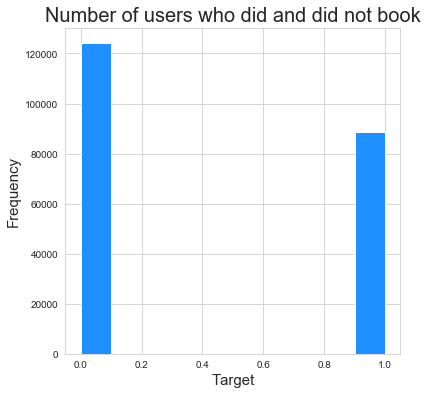

In [28]:
plt.figure(figsize=(6,6))
plt.xlabel('Target', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Number of users who did and did not book',fontsize=20)
plt.hist(df.target,color='dodgerblue',rwidth=5);

As we can see in this histogram, just over 120 000 users from the dataset did make a booking and around 90 000 did not. This suggests we have a target class imbalance which I will later rectify by upsampling.

## Who are AirBnb customers?

Let's now have a look at the data from users who made a booking on the website and compare it with users who did not book. This might help us find indication of what are the important features. 

### AGE

In [75]:
#creating separate datasets for users who did and did not book

#'yes booking = yb'
yb = df.loc[df.target == 1]

#'no booking = nb'
nb = df.loc[df.target == 0]

Median age of users who booked: 34.0
Median age of users who did not book: 34.0


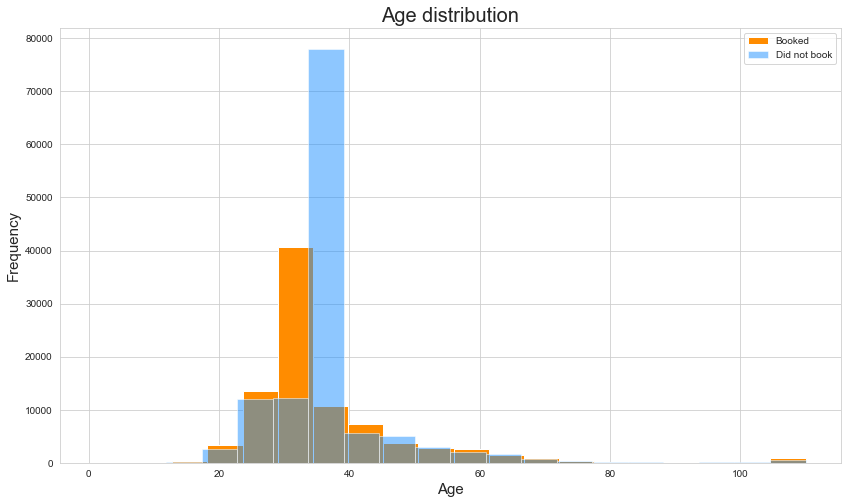

In [30]:
plt.figure(figsize=(14,8))
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Age distribution',fontsize=20)
plt.hist(yb.age,color='darkorange',rwidth=5,alpha=1,label='Booked',bins=20)
plt.hist(nb.age,color='dodgerblue',rwidth=5,alpha=0.5,label='Did not book',bins=20)
plt.legend();

print('Median age of users who booked: '+str(round(yb.age.median(),2)))
print('Median age of users who did not book: '+str(round(nb.age.median(),2)))

* The age of users who did not book is more concentrated around the mean age (it has a strong peak in ages between 35 to 40).
* The peak of users who booked is in the previous bin, but the peak is less strong. 
* Most users are between 25 to 40. Both distributions have positive/right skew. 
* Median for both distributions is almost identical.


### GENDER

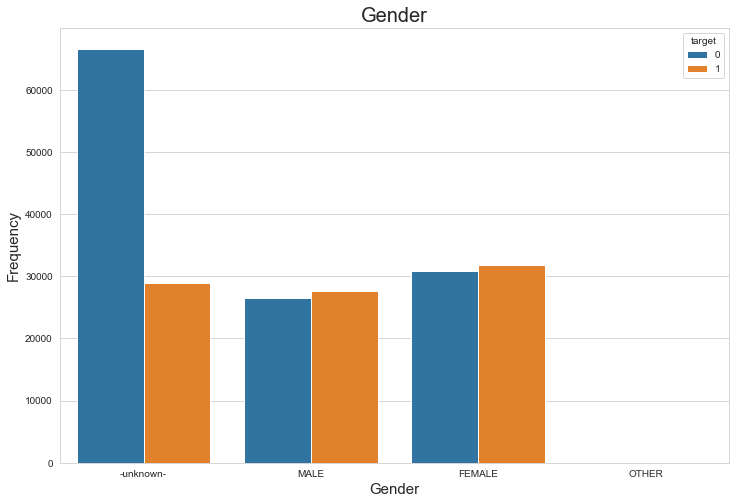

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x='gender',hue='target',data=df)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Gender',fontsize=20);

* The distribution of gender categories is pretty equal among users who made a booking, around 30 000.
* Users whose gender is unknown were twice as likely not to make a booking compared to other gender categories.
* This seems to be a significant factor for determining a user who will not make a booking. 
* Females are slightly more likely to make a booking than males
* Also, if we take into consideration the class imbalance mentioned above, users whose gender we know are generally more likely to make a booking than not!

### Sign-up method

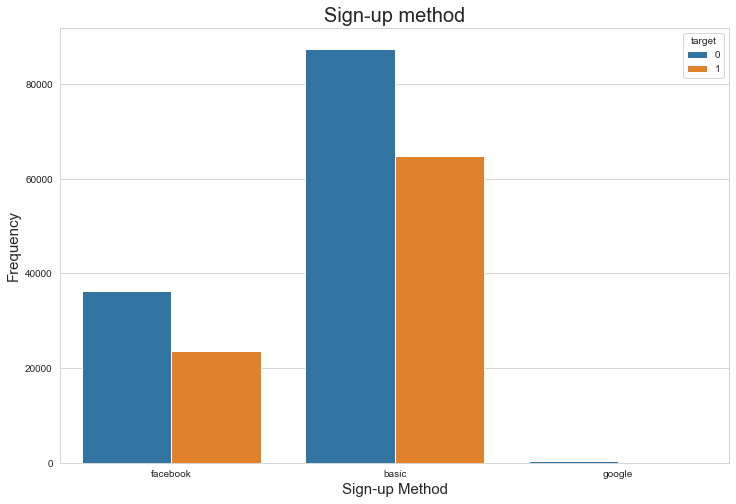

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x='signup_method',hue='target',data=df)
plt.xlabel('Sign-up Method', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Sign-up method',fontsize=20);

When creating an account, new users can use their email address, Facebook account or Google account to sign up.
This column represent these sign-up methods

* Most people signed up with their email address (basic)
* The second most popular method was Facebook account

### When did users create their accounts

In [33]:
df['date_account_created']= pd.to_datetime(df['date_account_created']) 
sns.set_style('white')

dates_ac_created_yb = dict(yb.date_account_created.value_counts())
dates_ac_created_nb = dict(nb.date_account_created.value_counts())

In [34]:
dict_ac_created_yb = dict()

for key in sorted(dates_ac_created_yb.keys()):
    dict_ac_created_yb.update({key:dates_ac_created_yb[key]})

dict_ac_created_nb = dict()

for key in sorted(dates_ac_created_nb.keys()):
    dict_ac_created_nb.update({key:dates_ac_created_nb[key]})

In [35]:
series_ac_created_yb = pd.Series(dict_ac_created_yb)
series_ac_created_nb = pd.Series(dict_ac_created_nb)

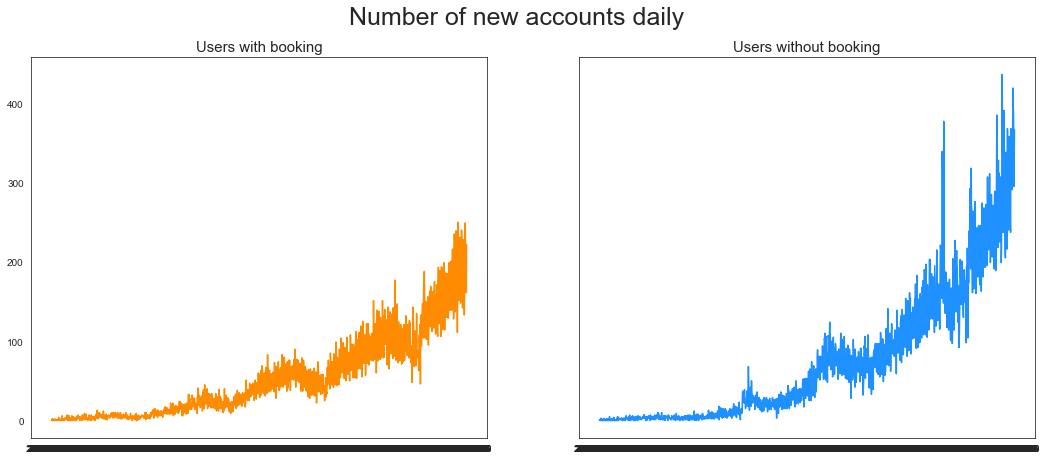

In [155]:
fig, axs = plt.subplots(1, 2, figsize=(18,7), sharey=True)
axs[0].plot(series_ac_created_yb,color='darkorange')
axs[0].set_title('Users with booking',fontsize=15)
axs[1].plot(series_ac_created_nb,color='dodgerblue')
axs[1].set_title('Users without booking',fontsize=15)
fig.suptitle('Number of new accounts daily',fontsize=25);

These two plots show the number of new accounts created per day from 2010 to 2014.
* The number of new accounts has risen exponentially
* The class imbalance is visible here - there are more accounts without booking

In [76]:
df.drop('date_account_created',axis=1, inplace=True)
df_ws.drop('date_account_created',axis=1, inplace=True)

### First browser

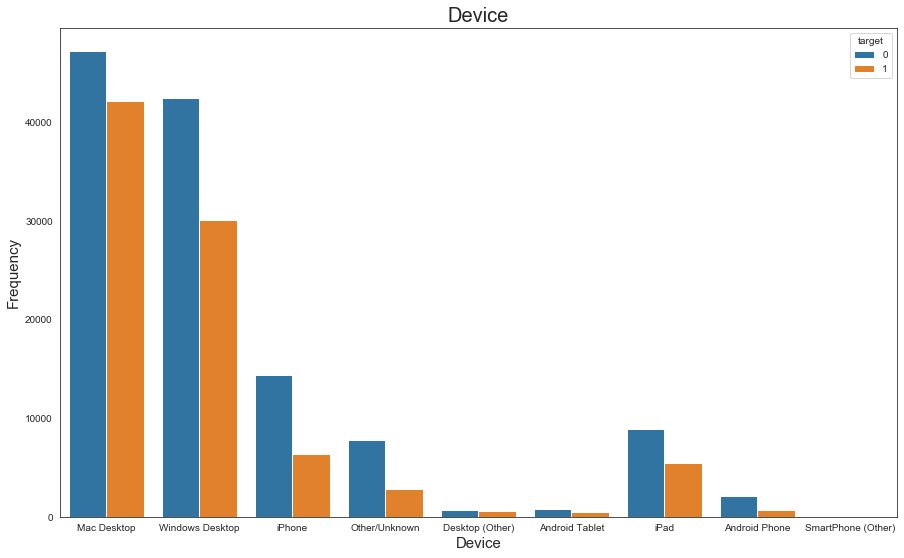

In [37]:
plt.figure(figsize=(15,9))
sns.countplot(x='first_device_type',hue='target',data=df)
plt.xlabel('Device', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Device',fontsize=20);

* By far the most popular devices are Mac and Windows desktop computers.
* Users of Mac Desktop are more likely to make a booking due to a small difference between users who booked it who did not
* Users using mobiles are less likely to book compared to those using desktop computers


### Sign-up Flow (the page a user came to signup up from)

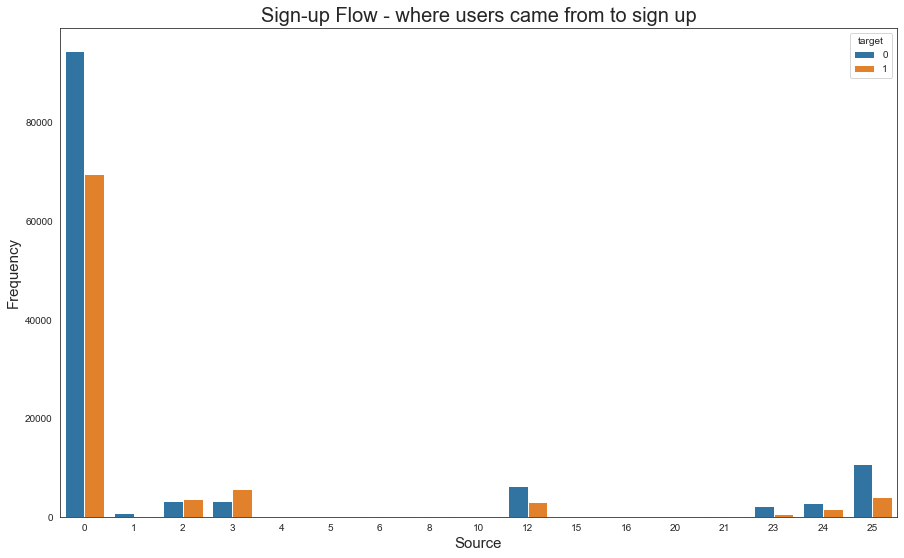

In [158]:
plt.figure(figsize=(15,9))
sns.countplot(x='signup_flow',hue='target',data=df)
plt.xlabel('Source', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Sign-up Flow - where users came from to sign up',fontsize=20);

* Unfortunately we don't know what sources there numbers represent, but most common by far is '0'
* Sources number 2 and 3 are most effective at converting users

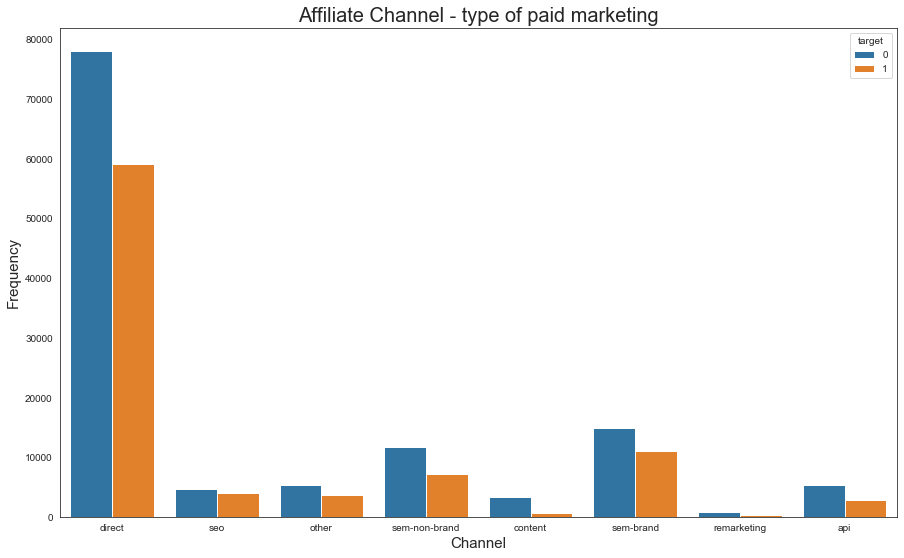

In [159]:
plt.figure(figsize=(15,9))
sns.countplot(x='affiliate_channel',hue='target',data=df)
plt.xlabel('Channel', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Affiliate Channel - type of paid marketing',fontsize=20);

* Most users come to the website directly, rather than via an advertisement.

## Data pre-processing

In [77]:
#dropping unneccesary columns
df.drop('id',axis=1, inplace= True)

In [78]:
#dropping unneccesary columns (sessions dataset)
df_ws.drop('id',axis=1, inplace= True)

In [79]:
df = pd.get_dummies(data=df, columns=['gender', 'signup_method','signup_flow','language','affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser'])

df_ws = pd.get_dummies(data=df_ws, columns=['gender', 'signup_method','signup_flow','language','affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser'])

## Splitting validation and training sets before SMOTE upsampling

In [81]:
len(df_ws)

73680

### Creating the validation set (5% of data)

In [82]:
#I am going to cut away a random 5% of the dataset for final testing.

from sklearn.model_selection import train_test_split

X_initial_split = df.drop('target',axis=1)
y_initial_split = df.target

#is = 'initial split'
X_train_is, X_test_is, y_train_is, y_test_is = train_test_split(X_initial_split, y_initial_split, test_size=0.05, random_state=123)

In [96]:
df = pd.concat([X_train_is,y_train_is],axis=1)

In [100]:
#Now I will do the same for our sessions dataset
X_initial_split_ws = df_ws.drop('target',axis=1)
y_initial_split_ws = df_ws.target

#is = 'initial split'
X_train_is_ws, X_test_is_ws, y_train_is_ws, y_test_is_ws = train_test_split(X_initial_split_ws, y_initial_split_ws, test_size=0.05, random_state=123)

In [106]:
df_ws = pd.concat([X_train_is_ws,y_train_is_ws],axis=1)

In [107]:
len(df_ws)

69996

**The following variables now contain the 5% validation set**

df validation set:
* y_test_is - labels
* X_test_is - data

df_ws validation set:
* y_test_is_ws - labels
* X_test_is_ws - data

### Creating the testing set (10% of data)

In [112]:
X = df.drop('target',axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)


In [116]:
X_ws = df_ws.drop('target',axis=1)
y_ws = df_ws.target

X_train_ws, X_test_ws, y_train_ws, y_test_ws = train_test_split(X_ws, y_ws, test_size=0.1, random_state=123)

## Upsampling with SMOTE

"SMOTE stands for Synthetic Minority Oversampling. Here, rather then simply oversampling the minority class with replacement (which simply adds duplicate cases to the dataset), the algorithm generates new sample data by creating 'synthetic' examples that are combinations of the closest minority class cases." from Learn.co curriculum

In [121]:
#to avoid data leakage when using SMOTE, I have split the data beforehand

from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=12)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [122]:
df = pd.concat([X_train,y_train],axis=1)

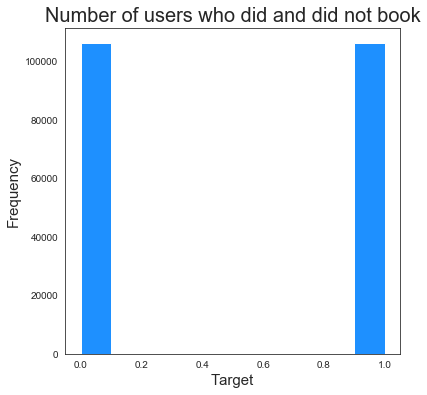

In [128]:
plt.figure(figsize=(6,6))
plt.xlabel('Target', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Number of users who did and did not book',fontsize=20)
plt.hist(df.target,color='dodgerblue',rwidth=5);

In [129]:
#now I will do the same with our sessions dataset

X_train_ws, y_train_ws = sm.fit_sample(X_train_ws, y_train_ws)
df_ws = pd.concat([X_train_ws,y_train_ws],axis=1)

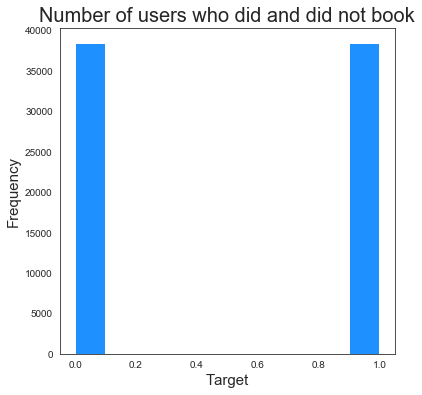

In [130]:
plt.figure(figsize=(6,6))
plt.xlabel('Target', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Number of users who did and did not book',fontsize=20)
plt.hist(df_ws.target,color='dodgerblue',rwidth=5);

In [131]:
len(df_ws)

76820

In [56]:
#Upsampling with sklearn

#from sklearn.utils import resample

# Separate majority and minority classes
#yb = class 1 = minority class
#nb = class 0 = majority class
 
# Upsample minority class
#df_minority_upsampled = resample(yb,
                    #         replace=True, 	# sample with replacement
                    #         n_samples=len(nb),    # to match majority class
                    #         random_state=123) # reproducible results
 
#Combine majority class with upsampled minority class
#df= pd.concat([nb, df_minority_upsampled])
 
# Display new class counts
#df.target.value_counts()


# Modelling 

## Fitting baseline simple model (random forest) #1

In [142]:
#importing libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

import stats_for_classification as stats

### PCA compression

In [133]:
#scaling data for PCA
scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train))

In [134]:
#fitting PCA components

pca_1 = PCA(n_components=110)
pca_2 = PCA(n_components=120)
pca_3 = PCA(n_components=130)

principalComponents = pca_1.fit_transform(scaled_X_train)
principalComponents = pca_2.fit_transform(scaled_X_train)
principalComponents = pca_3.fit_transform(scaled_X_train)

In [135]:
#looking at explained variance ratio of different number of components
print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

#120 components explains 97% of the variance

0.9133569622850373
0.9703845443107089
0.9975634479801206


In [136]:
#BASELINE MODEL WITHOUT GRIDSEARCH

pipe_baseline = Pipeline([('scl', MinMaxScaler()),
                  ('pca', PCA(n_components=120)),
                  ('clf', RandomForestClassifier(random_state = 123))])

pipe_baseline.fit(X_train,y_train)


Pipeline(memory=None,
         steps=[('scl', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=120,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                      

In [140]:
print('Training score: :'+str(pipe_baseline.score(X_train,y_train)))
print('Testing score: :'+str(pipe_baseline.score(X_test,y_test)))

Training score: :0.7732478737131608
Testing score: :0.6627066627066627


**The testing score of your baseline model is 66%**

Classification Report for: Baseline random forest
              precision    recall  f1-score   support

           0       0.71      0.70      0.71     11785
           1       0.59      0.61      0.60      8417

    accuracy                           0.66     20202
   macro avg       0.65      0.65      0.65     20202
weighted avg       0.66      0.66      0.66     20202

Confusion matrix, without normalization
[[8266 3519]
 [3295 5122]]


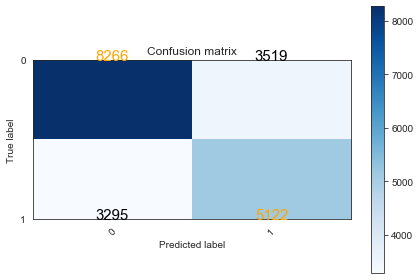

AUC: 0.6549652200435419


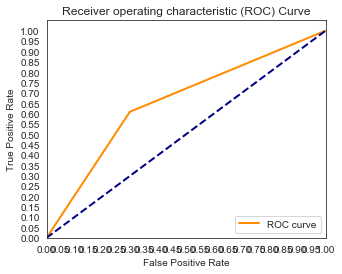

In [148]:
baseline_preds =pipe_baseline.predict(X_test)

stats.model_stats(y_test,baseline_preds,'Baseline random forest', False)

Comments: 
* This model has difficulty at predicting users who are truly making a booking (false negative). The models labels them 0 incorrectly 3295x
* The same applies to the opposite - false positive - 3519x

## Random forest with gridsearch #2

In [152]:
#let's try this model with gridsearch
pipe_baseline_grid = Pipeline([('scl', MinMaxScaler()),
                  ('pca', PCA(n_components=120)),
                  ('clf', RandomForestClassifier(random_state = 123,n_jobs=6))])

# Set grid search params
param_baseline_grid = [ 
  {'clf__n_estimators': [30,40,50],
   'clf__criterion': ['gini','entropy'], 
   'clf__max_depth': [20,40],  
   'clf__min_samples_leaf':[0.02,0.002],  
  }]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_baseline_grid,
            param_grid=param_baseline_grid,
            scoring='accuracy',
            cv=3, verbose=True, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  8.1min finished


Best accuracy: 0.664

Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 40, 'clf__min_samples_leaf': 0.002, 'clf__n_estimators': 50}


Classification Report for: Baseline random forest
              precision    recall  f1-score   support

           0       0.73      0.70      0.71     11785
           1       0.60      0.64      0.62      8417

    accuracy                           0.67     20202
   macro avg       0.67      0.67      0.67     20202
weighted avg       0.68      0.67      0.68     20202

Confusion matrix, without normalization
[[8198 3587]
 [2989 5428]]


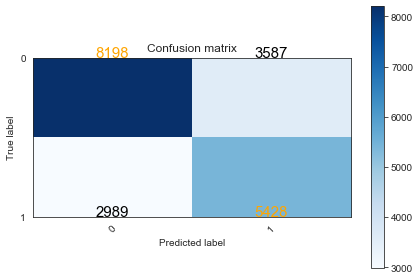

AUC: 0.6702576946296687


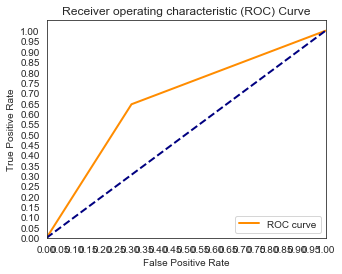

In [154]:
gs_rf_preds = gs_rf.predict(X_test)
stats.model_stats(y_test,gs_rf_preds,'Baseline random forest', False)

Comments: 
* This model has improved at eliminating false negatives - they decreased from 3295 to 2989
* The AUC score has also improved from 0.65 to 0.67

## Modelling dataset with sessions data with random forest and gridsearch #3

In [155]:
#scaling data for PCA
scaler = StandardScaler()
scaled_X_train_ws = pd.DataFrame(scaler.fit_transform(X_train_ws))

#fitting PCA components

pca_1 = PCA(n_components=90)
pca_2 = PCA(n_components=100)
pca_3 = PCA(n_components=110)

principalComponents = pca_1.fit_transform(scaled_X_train_ws)
principalComponents = pca_2.fit_transform(scaled_X_train_ws)
principalComponents = pca_3.fit_transform(scaled_X_train_ws)

In [156]:
#looking at explained variance ratio of different number of components
print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

#100 components explains 99% of the variance

0.9578074102651741
0.9940584706291892
0.999242888238753


In [157]:
pipe_baseline_grid_ws = Pipeline([('scl', MinMaxScaler()),
                  ('pca', PCA(n_components=100)),
                  ('clf', RandomForestClassifier(random_state = 123,n_jobs=6))])

# Set grid search params
param_baseline_grid_ws = [ 
  {'clf__n_estimators': [40,50],
   'clf__criterion': ['entropy'], 
   'clf__max_depth': [20,40],  
   'clf__min_samples_leaf':[0.02,0.002],  
  }]

# Construct grid search
gs_rf_ws = GridSearchCV(estimator=pipe_baseline_grid_ws,
            param_grid=param_baseline_grid_ws,
            scoring='accuracy',
            cv=3, verbose=True, return_train_score = True)

# Fit using grid search
gs_rf_ws.fit(X_train_ws, y_train_ws)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf_ws.best_score_)

# Best params
print('\nBest params:\n', gs_rf_ws.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.4min finished


Best accuracy: 0.701

Best params:
 {'clf__criterion': 'entropy', 'clf__max_depth': 20, 'clf__min_samples_leaf': 0.002, 'clf__n_estimators': 50}


Classification Report for: Baseline random forest
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      4302
           1       0.62      0.61      0.61      2698

    accuracy                           0.71      7000
   macro avg       0.69      0.69      0.69      7000
weighted avg       0.70      0.71      0.70      7000

Confusion matrix, without normalization
[[3299 1003]
 [1060 1638]]


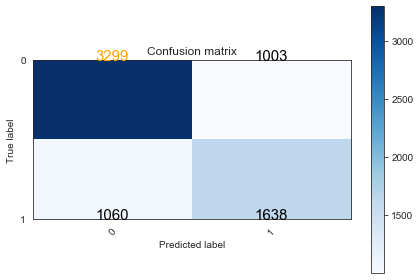

AUC: 0.6869845045954113


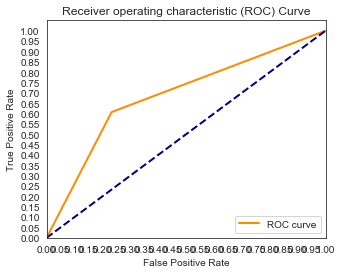

Testing score: :0.7052857142857143


In [160]:
gs_rf_preds_ws = gs_rf_ws.predict(X_test_ws)
stats.model_stats(y_test_ws,gs_rf_preds_ws,'Baseline random forest', False)

print('Testing score: :'+str(gs_rf_ws.score(X_test_ws,y_test_ws)))

Comments:
* This model contains less data, but is overall more accurate
* The accuracy is 70%, which is an improvement from 66%

## XGBoost model #4

In [164]:
#Instantiate XGBClassifier
xgb_cl_pipeline = XGBClassifier(nthread=6)


xgb_baseline_grid = Pipeline([('scl', MinMaxScaler()),
                 ('pca', PCA(n_components=120)),
                 ('clf', xgb_cl_pipeline)])

# Set grid search params
param_grid_xgb = {
    'learning_rate': [0.1,0.2,0.4],
    'max_depth': [30,40,50],
    'min_child_weight': [50,100,120],
   'subsample': [0.5,0.2],
    'n_estimators': [40,50,60],
}


grid_xgb = GridSearchCV(xgb_cl_pipeline, param_grid_xgb, scoring='accuracy', cv=None, n_jobs=1)
grid_xgb.fit(X_train, y_train)

best_parameters = grid_xgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xgb.predict(X_train)
test_preds = grid_xgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

KeyboardInterrupt: 

In [ ]:
#Result
#Grid Search found the following optimal parameters: 
#learning_rate: 0.7
#max_depth: 40
#min_child_weight: 1
#n_estimators: 40
#subsample: 0.7

#Training Accuracy: 77.27%
#Validation accuracy: 70.33%

In [ ]:
#trying an improved version

In [83]:
param_grid = {
    'learning_rate': [0.5,0.7],
    'max_depth': [30,40],
    'min_child_weight': [0.5,1,2],
    'subsample': [0.5],
    'n_estimators': [60],
}



grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

C:\Users\Nikol\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search found the following optimal parameters: 
learning_rate: 0.5
max_depth: 40
min_child_weight: 0.5
n_estimators: 60
subsample: 0.5

Training Accuracy: 77.2%
Validation accuracy: 70.08%


In [ ]:
#result
#Grid Search found the following optimal parameters: 
#learning_rate: 0.5
#max_depth: 40
#min_child_weight: 0.5
#n_estimators: 60
#subsample: 0.5

#Training Accuracy: 77.2%
#Validation accuracy: 70.08%

In [ ]:
#let's try the same with a pipeline

In [163]:
#Instantiate XGBClassifier
xgb_cl_pipeline = XGBClassifier(nthread=6)


xgb_pipe_baseline_grid = Pipeline([('scl', MinMaxScaler()),
                 ('pca', PCA(n_components=120)),
                 ('clf', xgb_cl_pipeline)])

# Set grid search params
param_grid = {
    'learning_rate': [0.1,0.2,0.4],
    'max_depth': [30,40,50],
    'min_child_weight': [50,100,120],
   'subsample': [0.5,0.2],
    'n_estimators': [40,50,60],
}


grid_xgb = GridSearchCV(xgb_cl_pipeline, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xgb.fit(X_train, y_train)

best_parameters = grid_xgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xgb.predict(X_train)
test_preds = grid_xgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

KeyboardInterrupt: 

Classification Report for: XGB Pipeline Random Forest
              precision    recall  f1-score   support

           0       0.70      0.70      0.70     11138
           1       0.70      0.70      0.70     11205

    accuracy                           0.70     22343
   macro avg       0.70      0.70      0.70     22343
weighted avg       0.70      0.70      0.70     22343

Confusion matrix, without normalization
[[7822 3316]
 [3382 7823]]


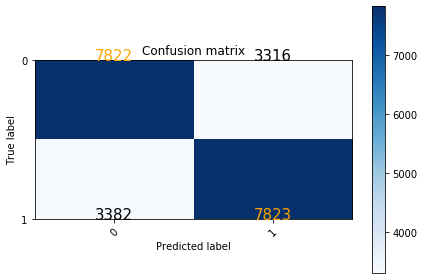

AUC: 0.7002254704258265


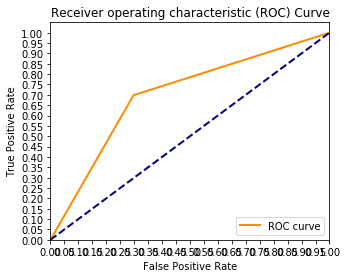

In [77]:
#Grid Search found the following optimal parameters: 
#learning_rate: 0.1
#max_depth: 30
#min_child_weight: 0.5
#n_estimators: 80
#subsample: 0.5

#Training Accuracy: 76.81%
#Validation accuracy: 70.08%






stats.model_stats(y_test,test_preds,'XGB Pipeline', False)

In [ ]:
xboost_preds = grid_clf.predict(X_test)

In [46]:
import stats_for_classification as stats

In [ ]:
stats.model_stats(y_test,xboost_preds,'XBOOST',False)

In [44]:
#test with sessions data

#Instantiate XGBClassifier
xgb_cl_pipeline = XGBClassifier(nthread=6)


xgb_pipe_baseline_grid = Pipeline([('scl', MinMaxScaler()),
                 ('pca', PCA(n_components=100)),
                 ('clf', xgb_cl_pipeline)])

# Set grid search params
param_grid = {
    'learning_rate': [0.1,0.2,0.4],
    'max_depth': [30,40,50],
    'min_child_weight': [0.5,1],
   'subsample': [0.5,0.2],
    'n_estimators': [50,60,80],
}


grid_xgb = GridSearchCV(xgb_cl_pipeline, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xgb.fit(X_train, y_train)

best_parameters = grid_xgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xgb.predict(X_train)
test_preds = grid_xgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

C:\Users\Nikol\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 40
min_child_weight: 1
n_estimators: 50
subsample: 0.2

Training Accuracy: 78.21%
Validation accuracy: 71.61%


Classification Report for: XBOOST with sessions data
              precision    recall  f1-score   support

           0       0.75      0.80      0.78      4070
           1       0.65      0.59      0.62      2562

    accuracy                           0.72      6632
   macro avg       0.70      0.69      0.70      6632
weighted avg       0.71      0.72      0.71      6632

Normalized confusion matrix
[[0.7968059  0.2031941 ]
 [0.41217799 0.58782201]]


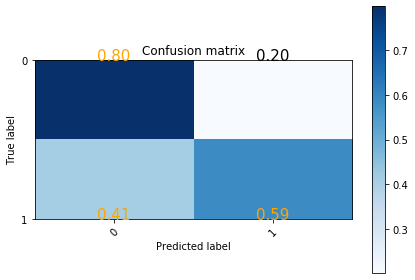

AUC: 0.6923139554287095


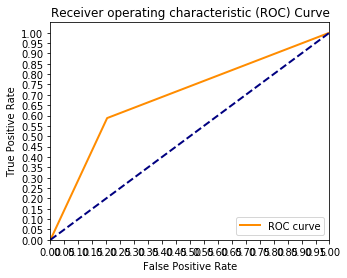

In [49]:
stats.model_stats(y_test, test_preds,'XBOOST with sessions data',True)

In [60]:
#Instantiate XGBClassifier
xgb_cl_pipeline = XGBClassifier(nthread=6)


xgb_pipe_baseline_grid = Pipeline([('scl', MinMaxScaler()),
                 ('pca', PCA(n_components=100)),
                 ('clf', xgb_cl_pipeline)])

# Set grid search params
param_grid = {
    'learning_rate': [0.1],
    'max_depth': [30],
    'min_child_weight': [110],
   'subsample': [0.5],
    'n_estimators': [40],
}


grid_xgb = GridSearchCV(xgb_cl_pipeline, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xgb.fit(X_train, y_train)

best_parameters = grid_xgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xgb.predict(X_train)
test_preds = grid_xgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

C:\Users\Nikol\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 30
min_child_weight: 110
n_estimators: 40
subsample: 0.5

Training Accuracy: 72.59%
Validation accuracy: 73.13%
